In [2]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#np.set_printoptions(threshold=np.inf, linewidth=np.inf)

accuracy= 0.3968253968253968


(array([27., 52.,  0., 60.,  0., 62., 66.,  0., 70., 41.]),
 array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]),
 <BarContainer object of 10 artists>)

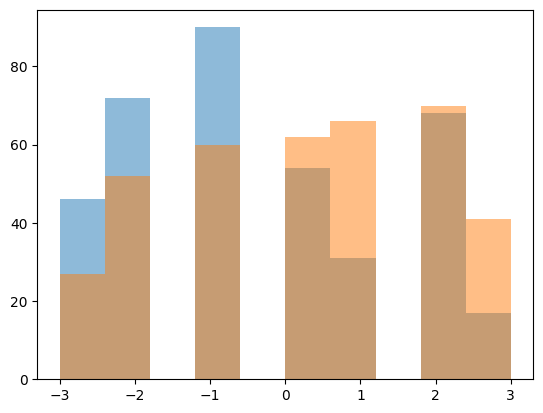

In [9]:

# Load data and obtain indices to extract training vs. testing data
data = np.loadtxt(r"C:\Users\macke\OneDrive\Documents\GitHub\SN_2023\eeg_classification_v1\all_fouriers2",delimiter=",")
PercentTraining = 0.8
num_samples = data.shape[0]
ind = np.arange(1,num_samples+1)
num_train = int(num_samples*PercentTraining)
TrainingRowInds = np.random.choice(num_samples, num_train, replace=False)
ValidationRowInds = np.setdiff1d(np.arange(1, num_samples), TrainingRowInds)

# Split training and testing data into features and labels
TrainingFeatures = data[TrainingRowInds,:-1]
TrainingLabels = data[TrainingRowInds,-1:]
ValidationFeatures = data[ValidationRowInds,:-1]
ValidationLabels = data[ValidationRowInds,-1:]

# Perform KNN Classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(TrainingFeatures, TrainingLabels.ravel())
results = knn.predict(ValidationFeatures)
#print(results)

#testing = n_network.predict(testing_features)
count = 0
for i in range(len(results)):
    if np.sign(ValidationLabels[i]) == np.sign(results[i]):
        count += 1

print("accuracy=", count/len(results))

plt.hist(results,alpha=0.5)
plt.hist(ValidationLabels,alpha=0.5)



In [17]:
# The code shown below is the same as above, but now iterating over the number of nearest neighbours to produce a scree plot so we can
# determine an optimal number of nearest neighbours

# Load data and obtain indices to extract training vs. testing data
data = np.loadtxt(r"C:\Users\macke\OneDrive\Documents\GitHub\SN_2023\eeg_classification_v1\all_fouriers2",delimiter=",")
PercentTraining = 0.8
num_samples = data.shape[0]
ind = np.arange(1,num_samples+1)
num_train = int(num_samples*PercentTraining)
TrainingRowInds = np.random.choice(num_samples, num_train, replace=False)
ValidationRowInds = np.setdiff1d(np.arange(1, num_samples), TrainingRowInds)

# Split training and testing data into features and labels
TrainingFeatures = data[TrainingRowInds,:-1]
TrainingLabels = data[TrainingRowInds,-1:]
ValidationFeatures = data[ValidationRowInds,:-1]
ValidationLabels = data[ValidationRowInds,-1:]

maxNumNeighbours = 2088
accuracy = np.zeros((maxNumNeighbours))

for i in range(1, maxNumNeighbours):
    # Perform KNN Classification
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(TrainingFeatures, TrainingLabels.ravel())
    results = knn.predict(ValidationFeatures)
    #print(results)

    count = 0
    for j in range(len(results)):
        if np.sign(ValidationLabels[j]) == np.sign(results[j]):
            count += 1

    accuracy[i] = count/(len(results))

plt.plot(accuracy)
#print("accuracy=", count/len(results))
    

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 1509, n_samples_fit = 1508, n_samples = 377